In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [13]:
df['Date'].dtype

dtype('<M8[ns]')

<AxesSubplot:>

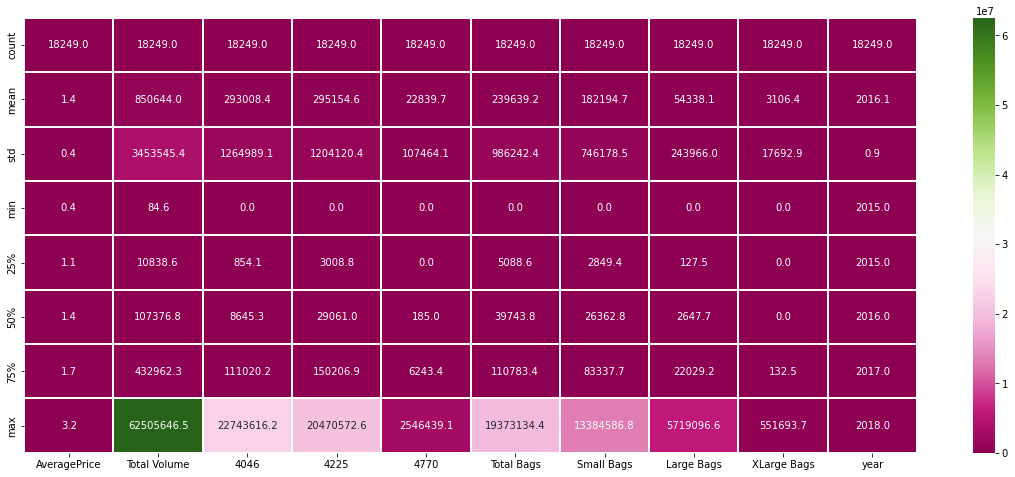

In [14]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [15]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.406,0.403,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013,3453545.355,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.425,1264989.082,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568,1204120.401,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.736,107464.068,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202,986242.399,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.687,746178.515,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088,243965.965,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.427,17692.895,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.148,0.940,2015.00,2015.00,2016.00,2017.00,2018.00


In [16]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.4059784097758825 USD


<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

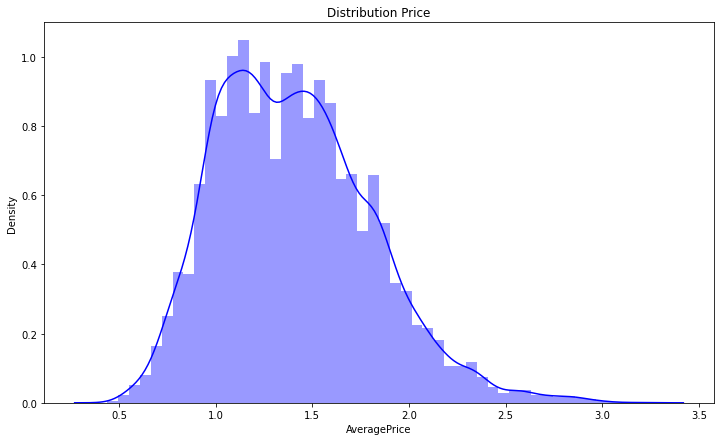

In [17]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

In [18]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [20]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

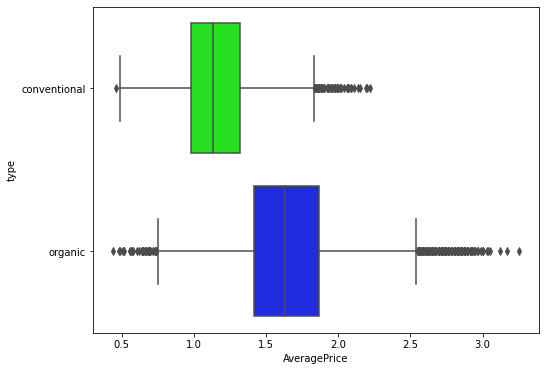

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

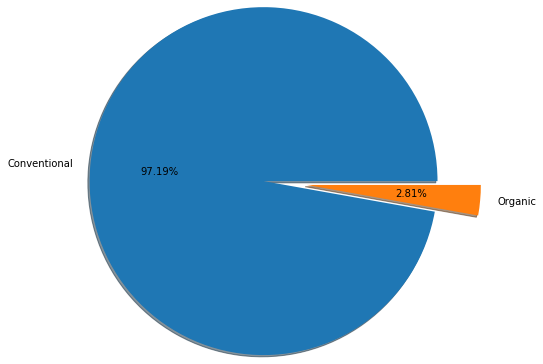

In [22]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [23]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

In [24]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [25]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

In [26]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

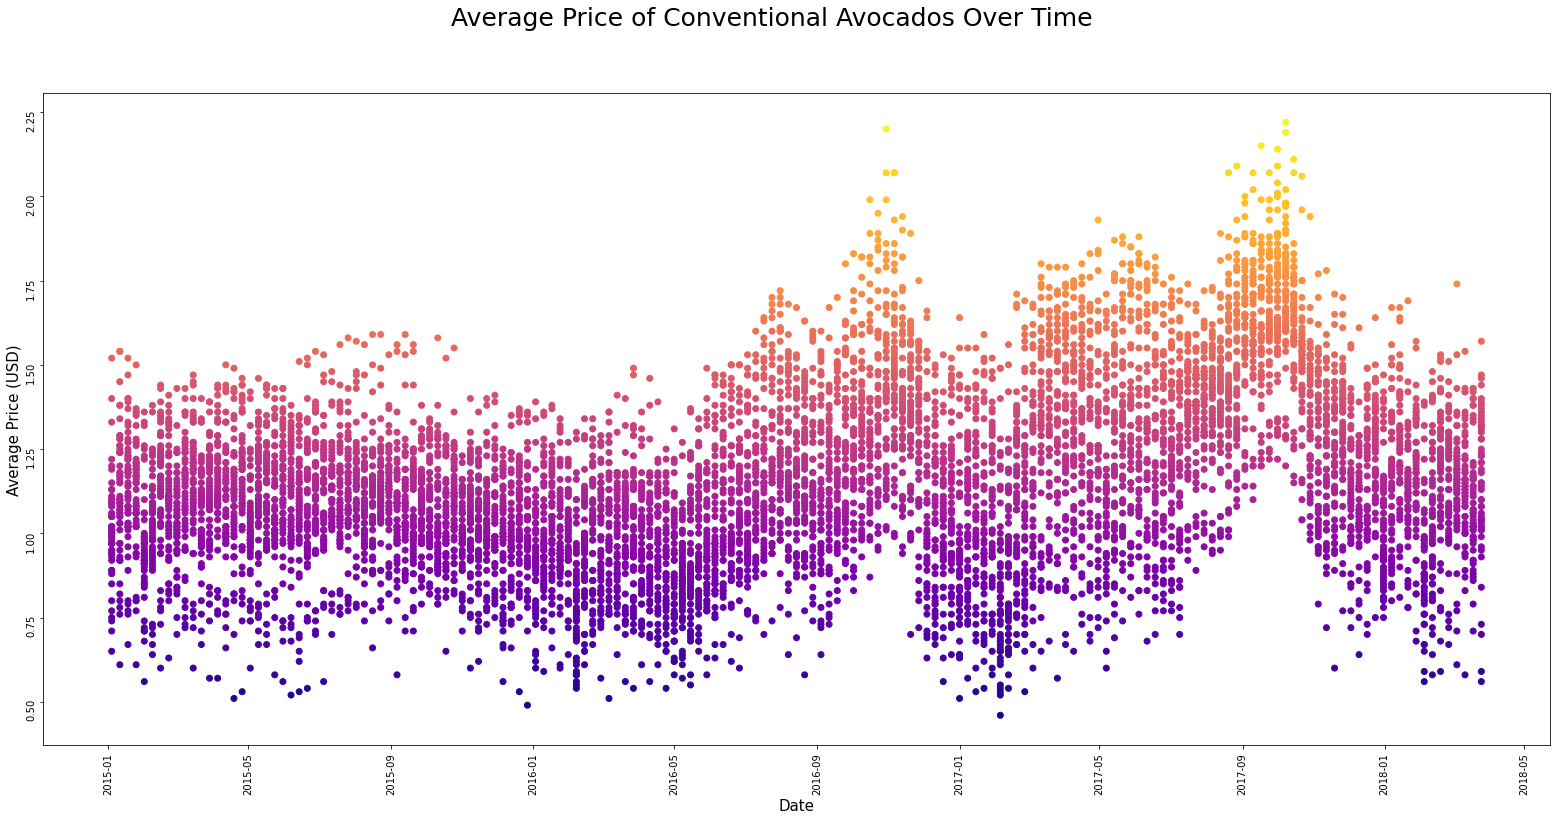

In [27]:
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

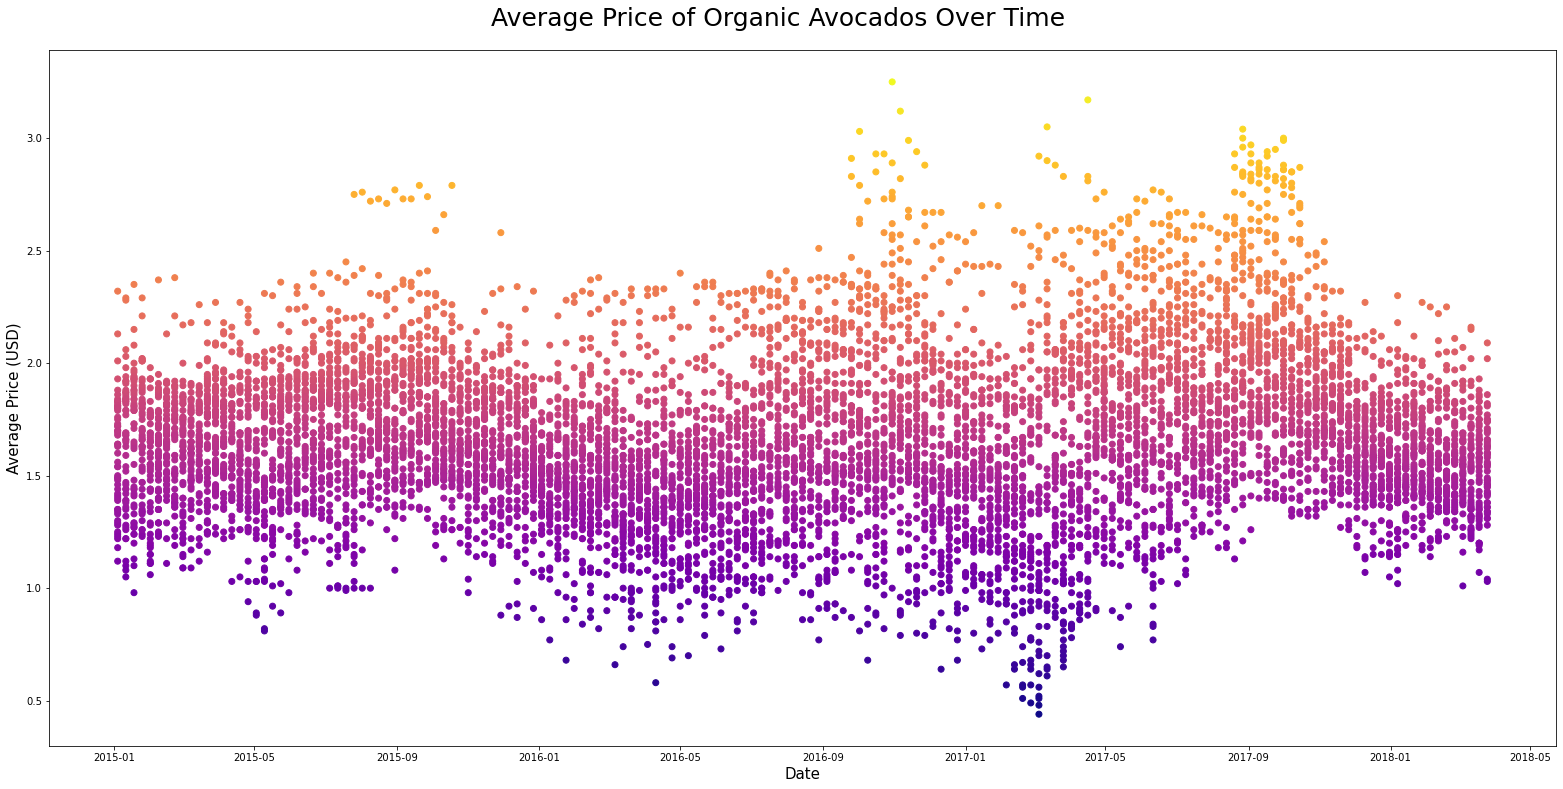

In [28]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [29]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


In [30]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
df1=df.copy()

In [32]:
# Creating Datframe for numeric features
df1.drop(['Date','type','region','year'], axis=1, inplace=True)

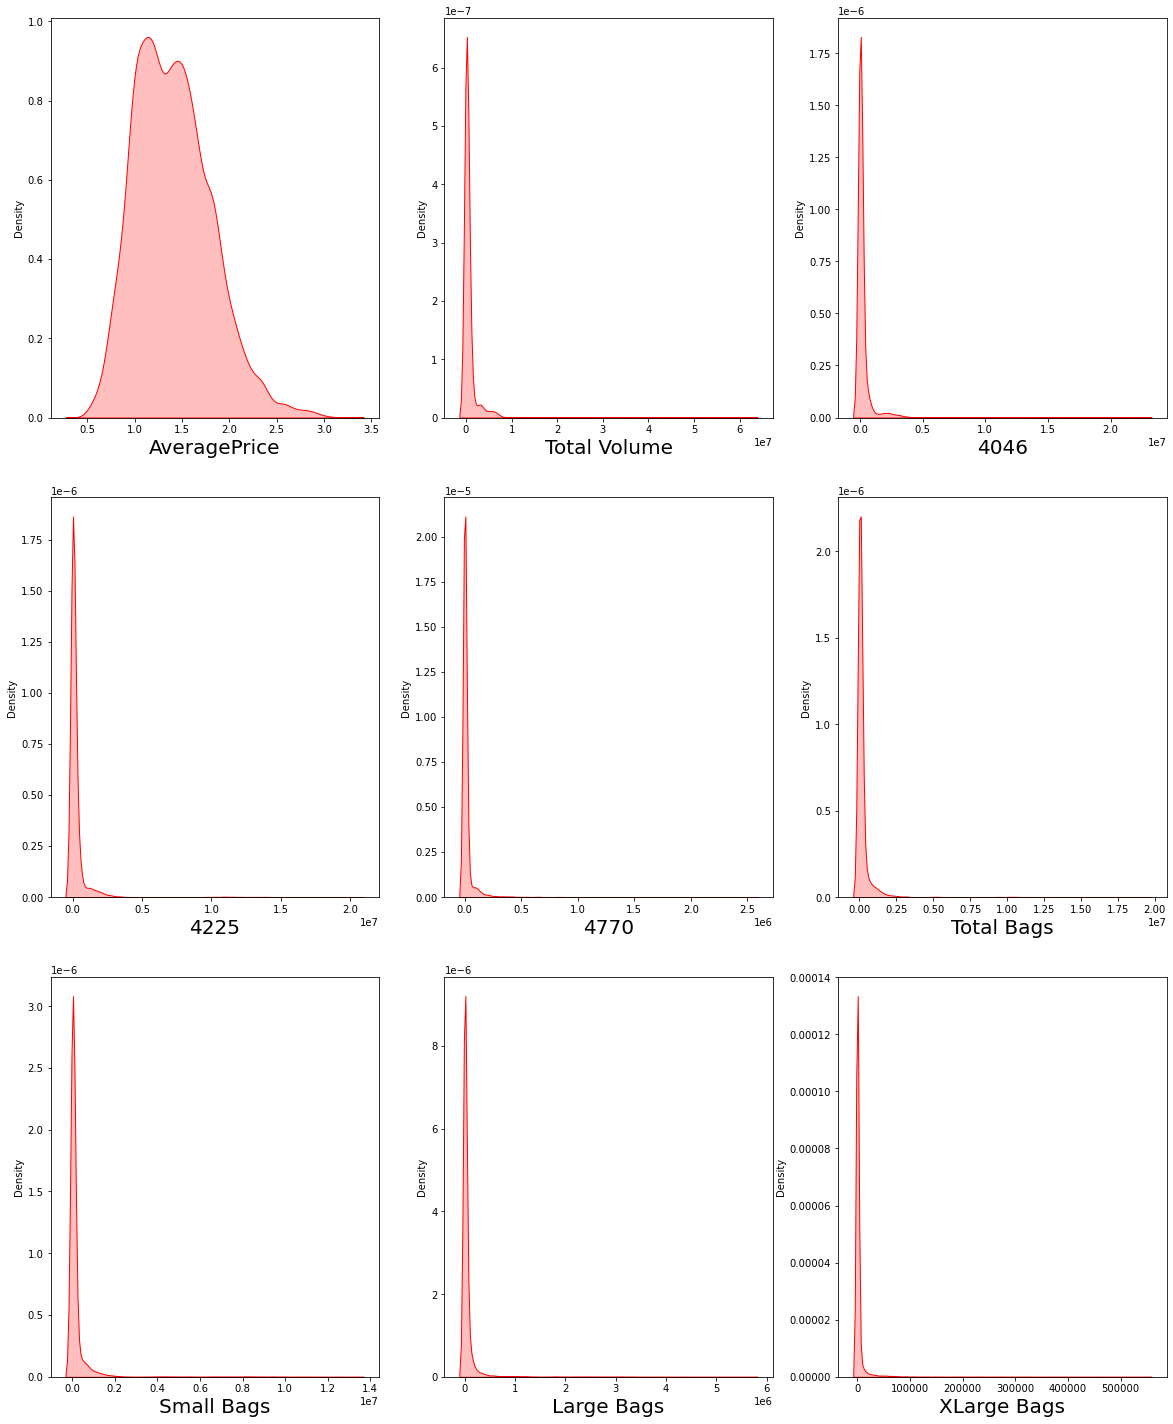

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

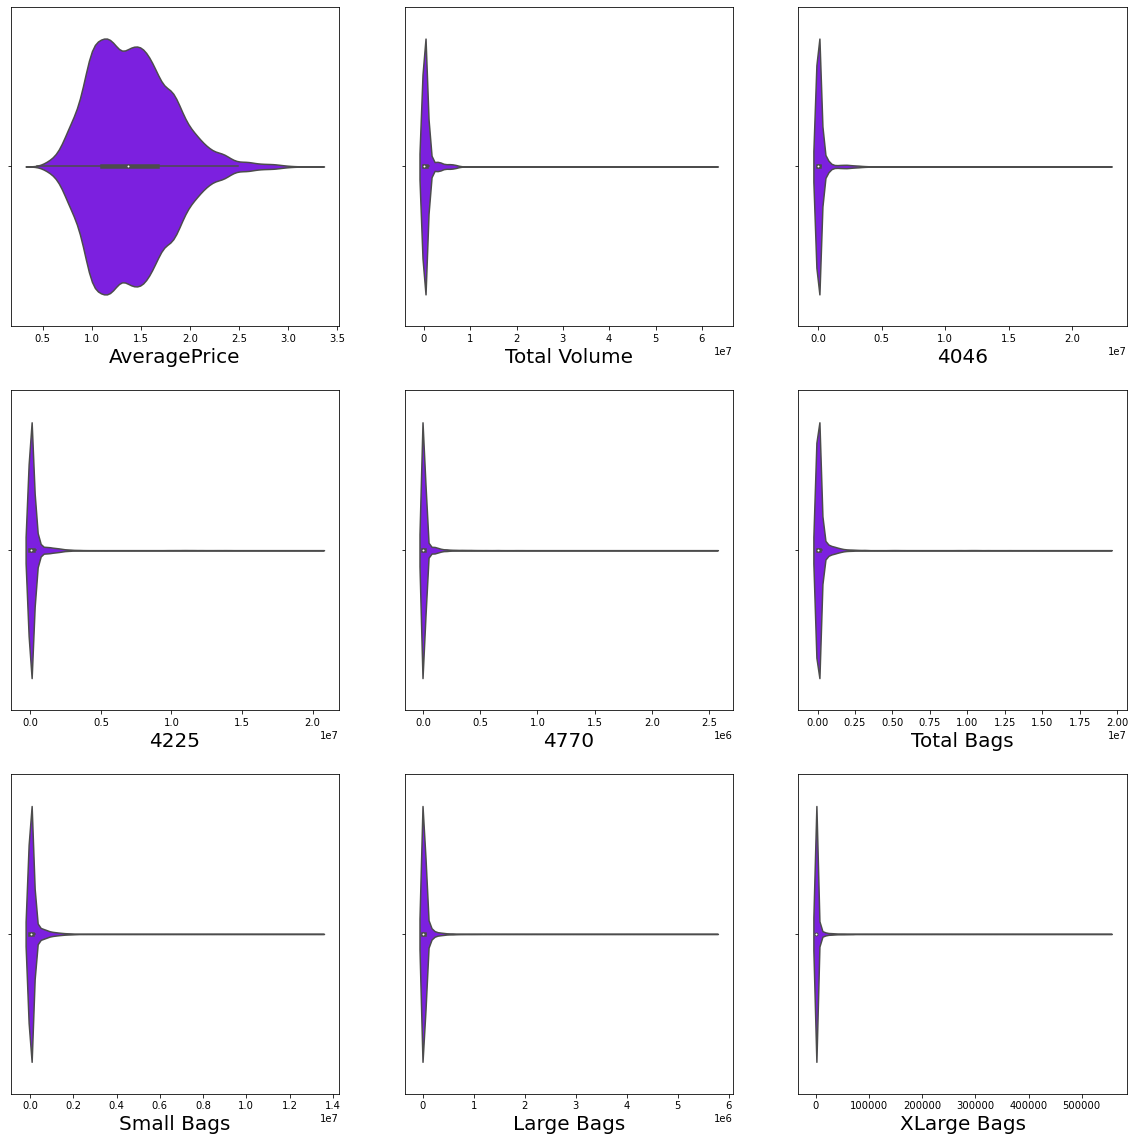

In [34]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [35]:
df=pd.read_csv('avocado.csv')

In [36]:
df2=df.copy()

In [37]:
df2['Year'], df2['Month'], df2['Day'] = df2['Date'].str.split('-').str
df2.drop(columns=['Date','year'], inplace=True)
df2

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [38]:
# Converting Datetime datatypes to int
df2['Year']=df2['Year'].astype(int)
df2['Month']=df2['Month'].astype(int)
df2['Date']=df2['Day'].astype(int)

In [39]:
df2.drop(columns=['Day'],axis=1, inplace=True)

In [40]:
df2.drop(columns=['Date'],axis=1, inplace=True)

In [41]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [42]:
# Checking unique values and Yearwise total No of sale entry
df2['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

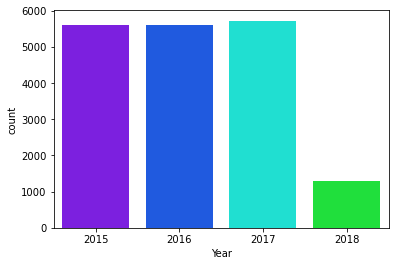

In [43]:
sns.countplot('Year',data=df2)

<AxesSubplot:xlabel='Month', ylabel='count'>

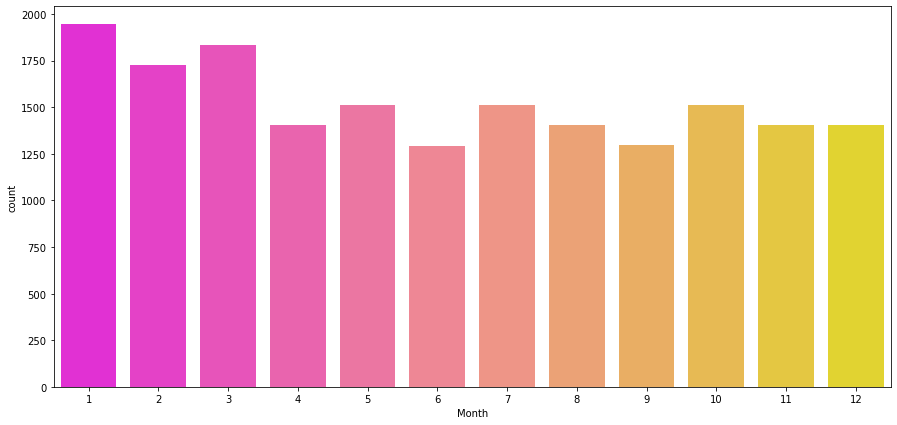

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df2, palette="spring")

In [45]:
df2['Month'].value_counts().max()

1944

In [46]:
df2['Month'].value_counts().min()

1294

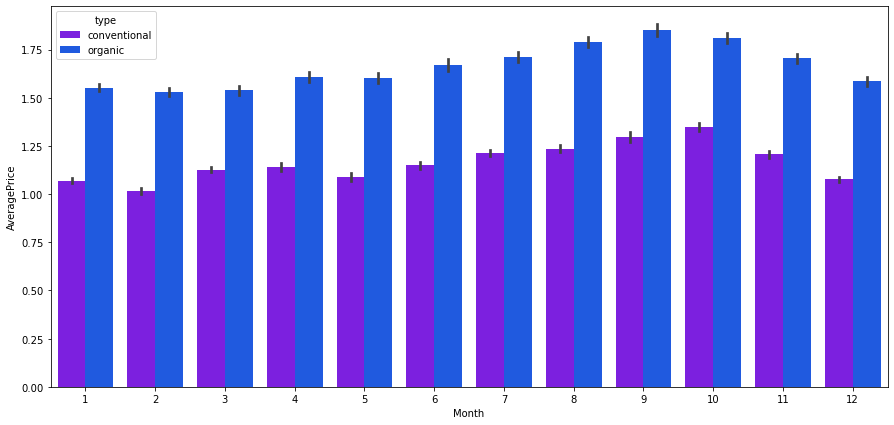

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df2)
plt.show()

In [48]:
df2.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 720x720 with 0 Axes>

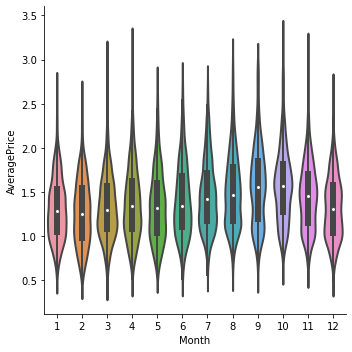

In [49]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df2, linewidth=2)
plt.show()

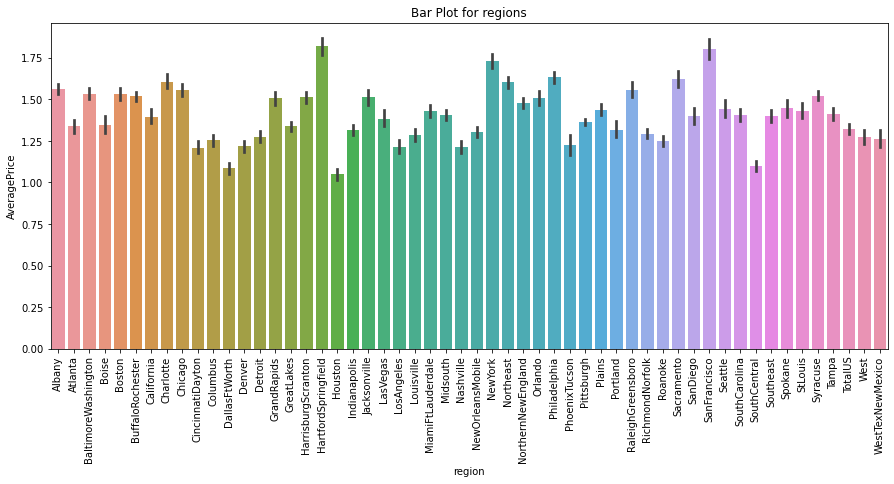

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df2)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

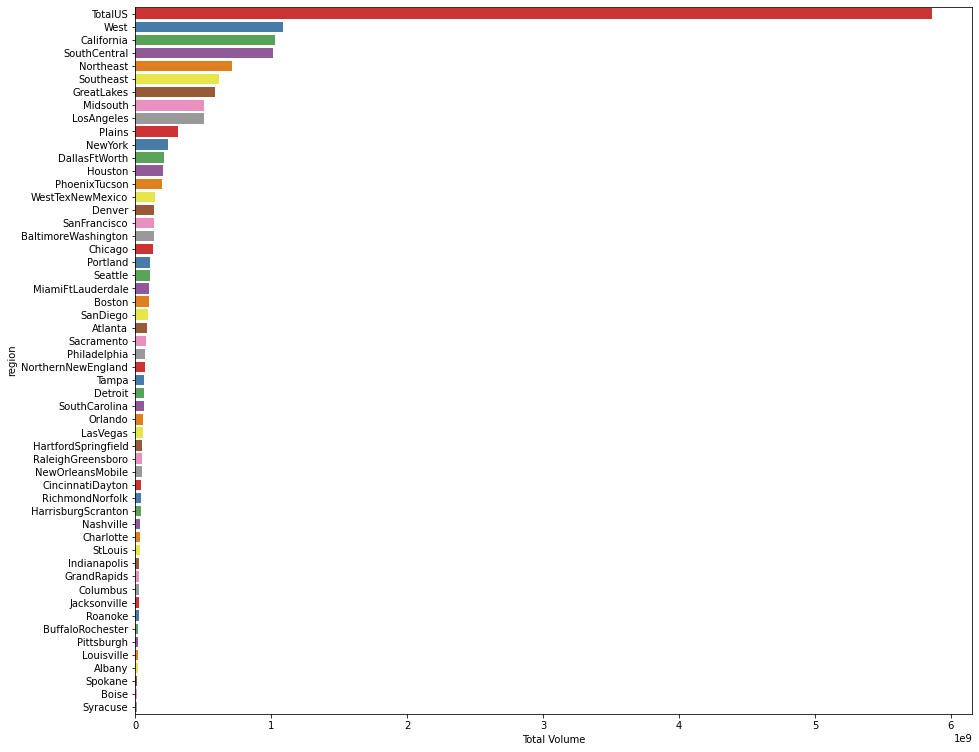

In [51]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [52]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


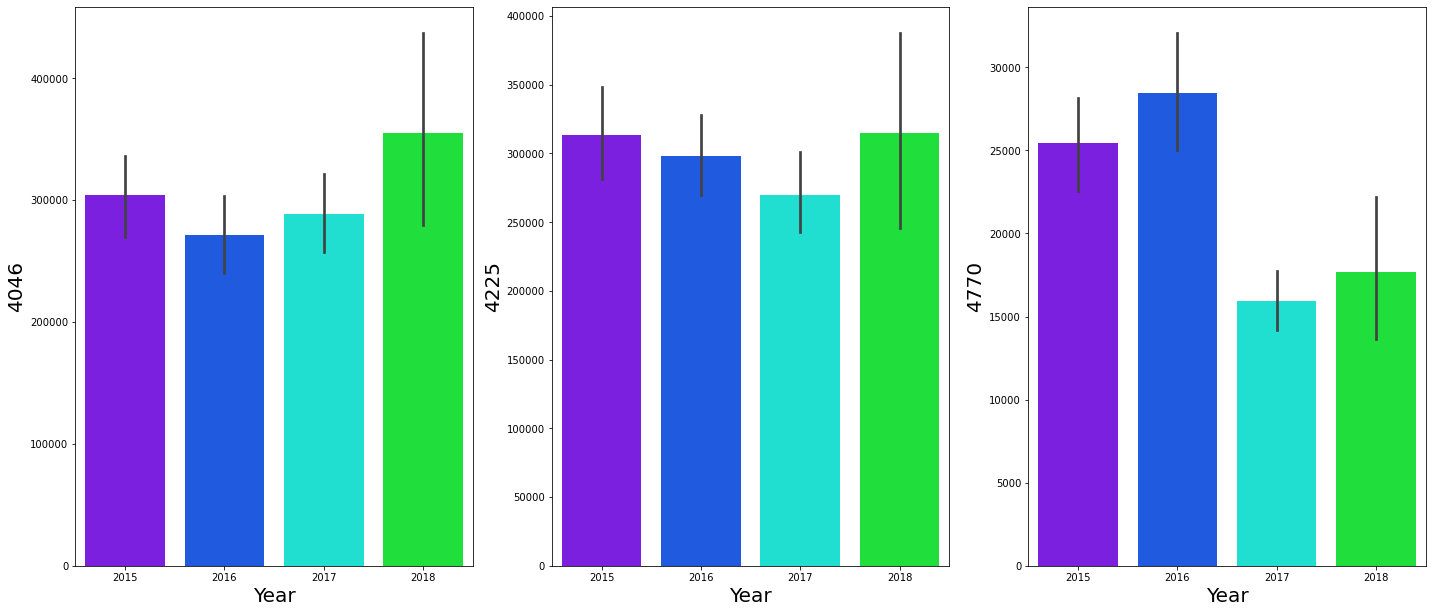

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

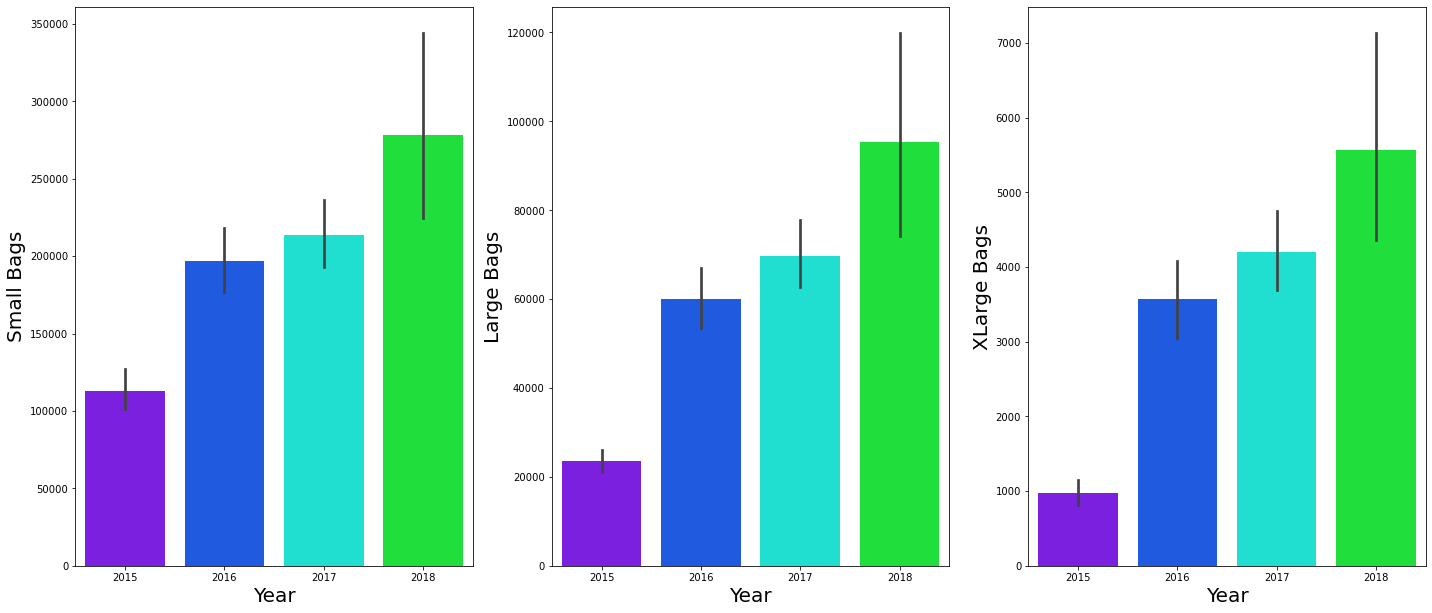

In [54]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

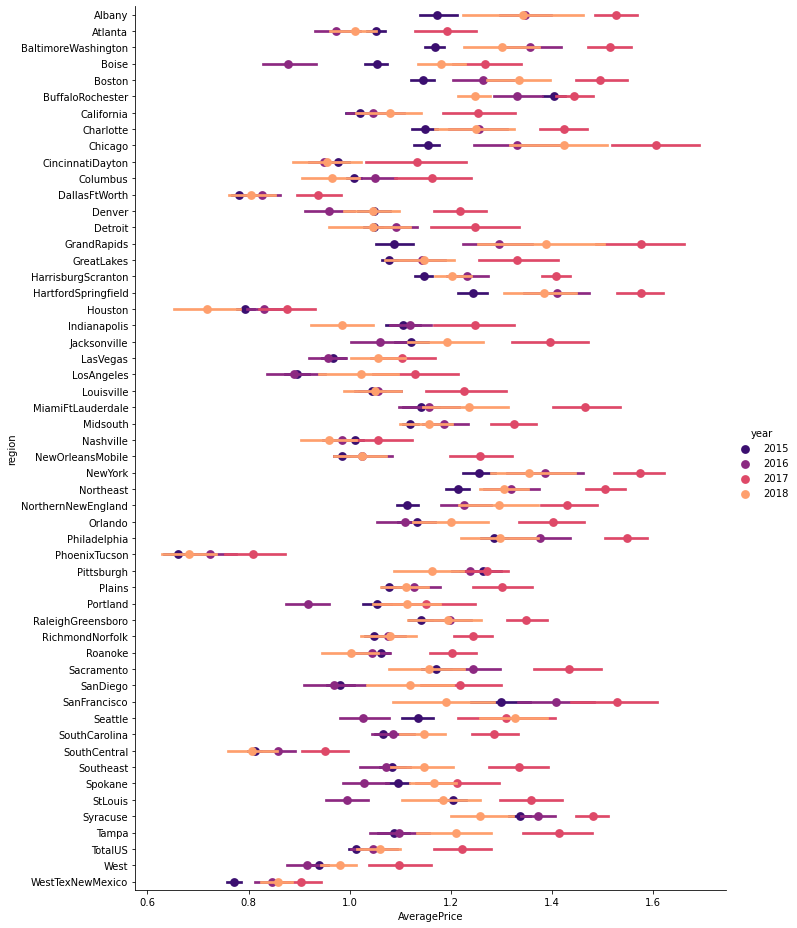

In [55]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

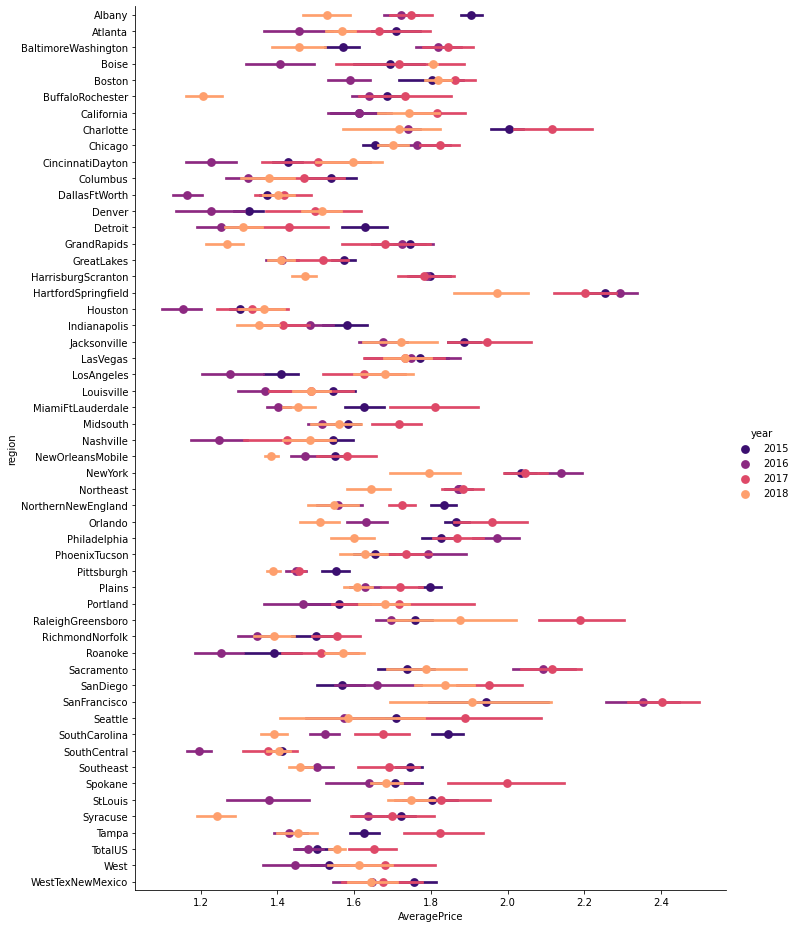

In [56]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

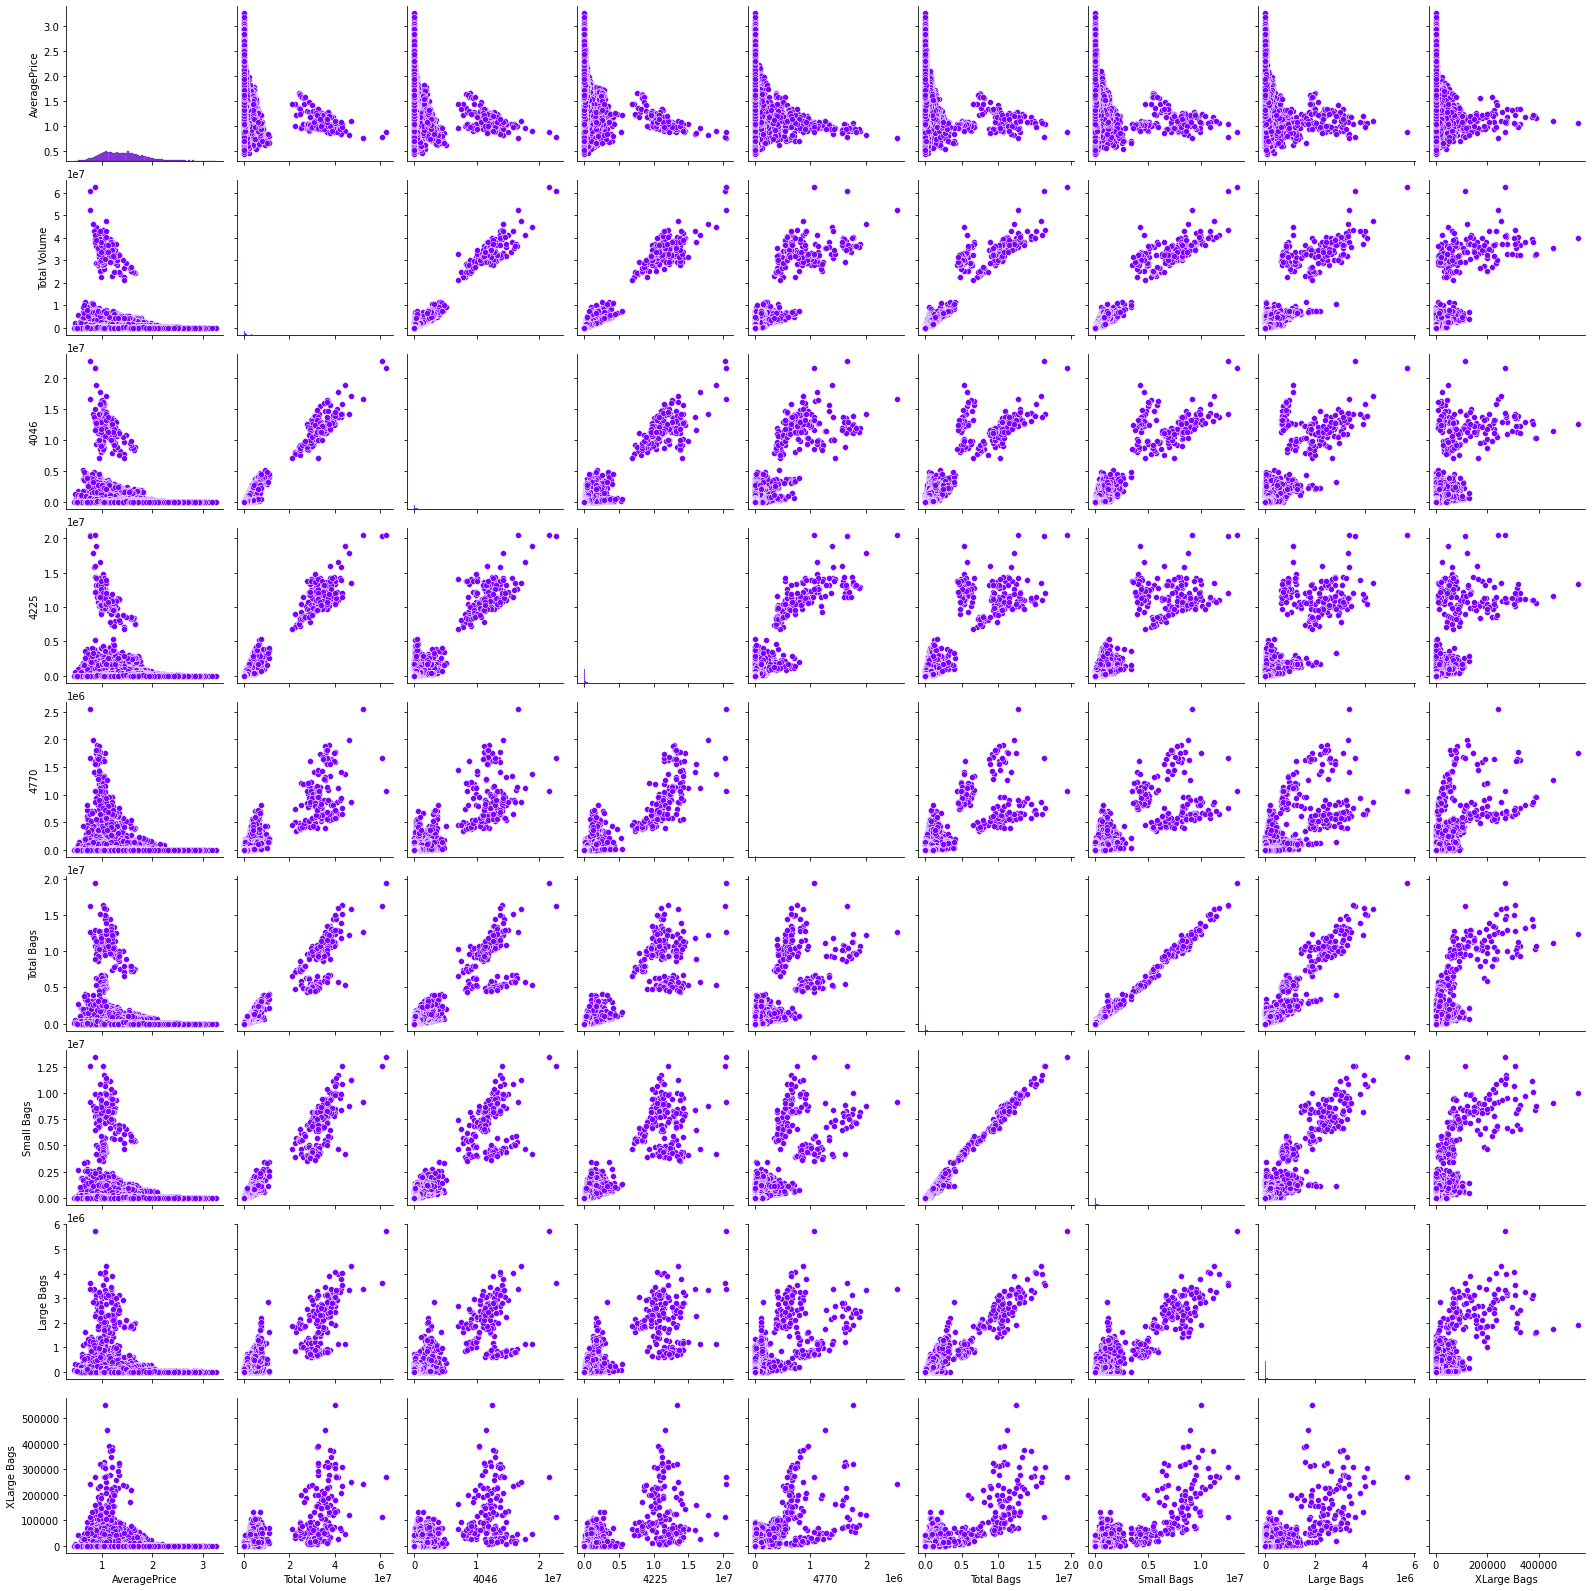

In [57]:
sns.pairplot(df1)

In [58]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['region']=le.fit_transform(df2['region'])
df2['type']=le.fit_transform(df2['type'])
df2.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


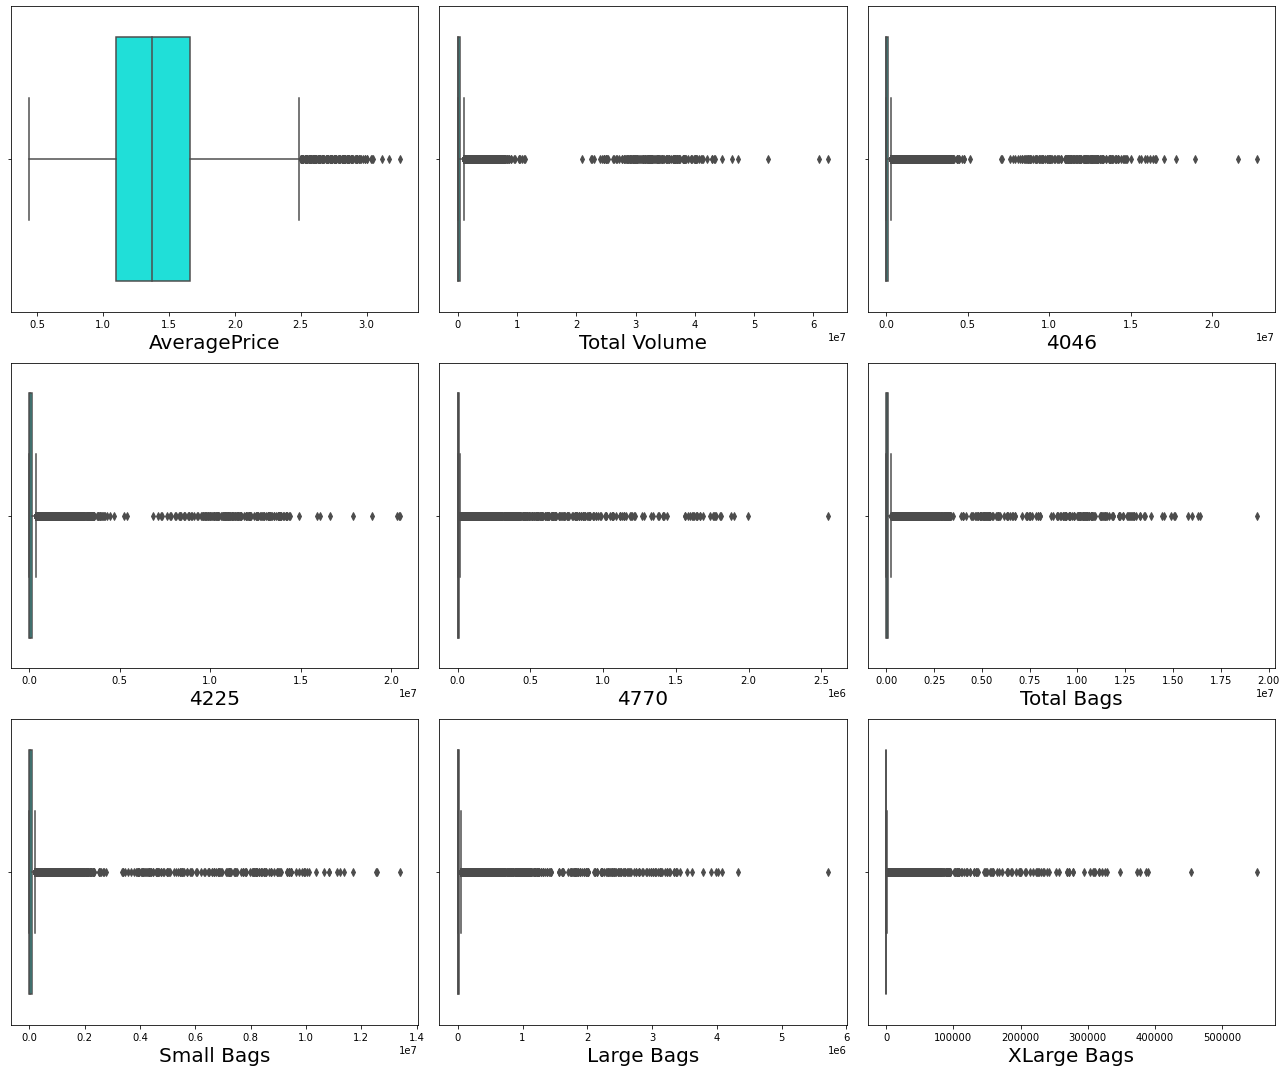

In [59]:
#Outliers Detection and Removal
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
threshold = 3
df3 = df2[(z<3).all(axis = 1)]

In [61]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df3.shape)

Shape of dataset after removing outliers : (17651, 14)


In [62]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


In [63]:
df3.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
Unnamed: 0,1.000000,-0.126781,0.017336,0.019337,0.029467,0.052711,-0.016020,-0.011083,-0.026140,-0.012751,0.004325,-0.001651,-0.170651,-0.780789
AveragePrice,-0.126781,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.091704,0.149502
Total Volume,0.017336,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.004866,-0.018645
4046,0.019337,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.034636,-0.015797
4225,0.029467,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.040234,-0.019844
4770,0.052711,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.082054,-0.027245
Total Bags,-0.016020,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.103442,-0.010916
Small Bags,-0.011083,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.086639,-0.013018
Large Bags,-0.026140,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,0.119543,-0.001457
XLarge Bags,-0.012751,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.108209,0.002843


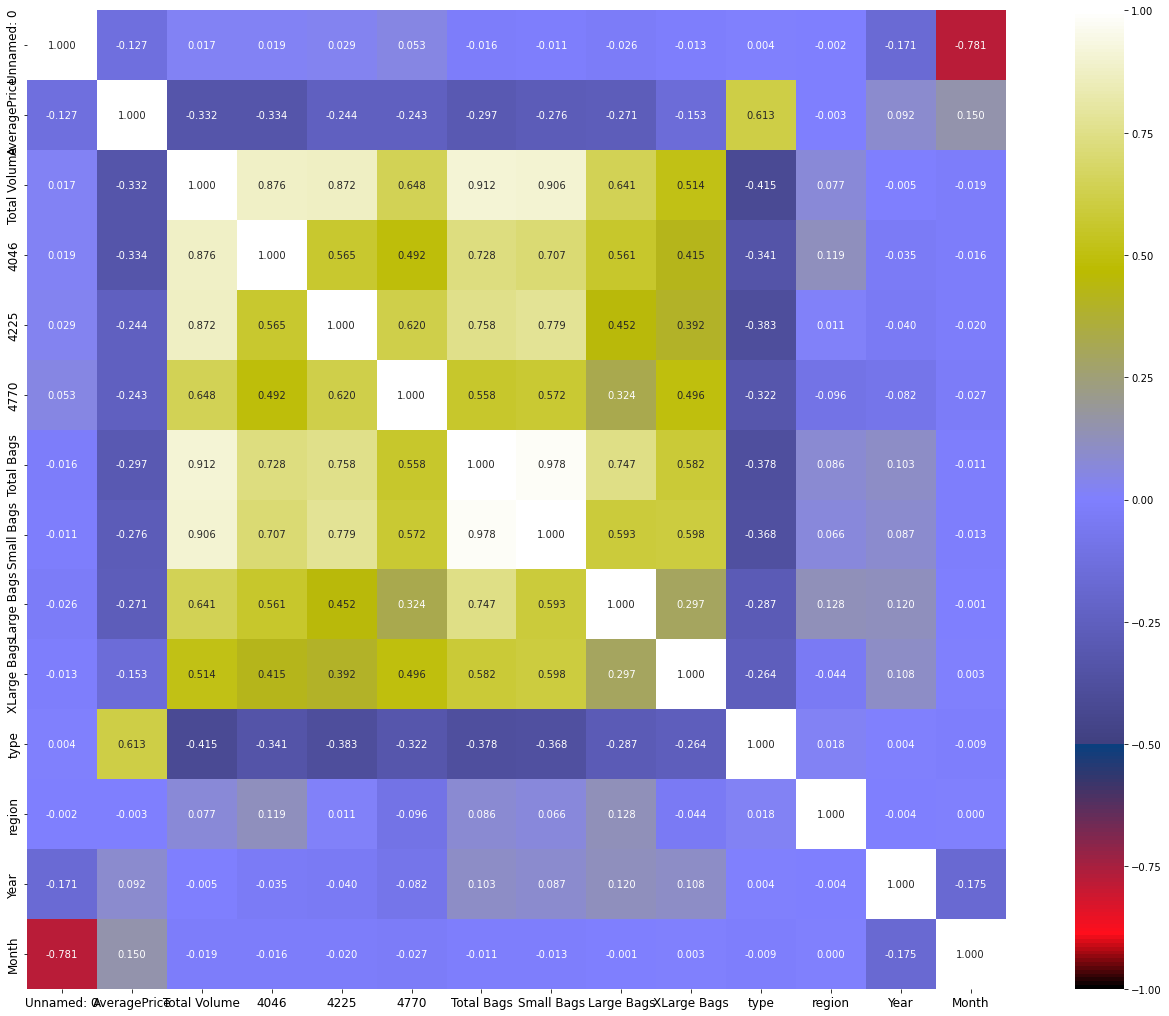

In [64]:
plt.figure(figsize=(25,18))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

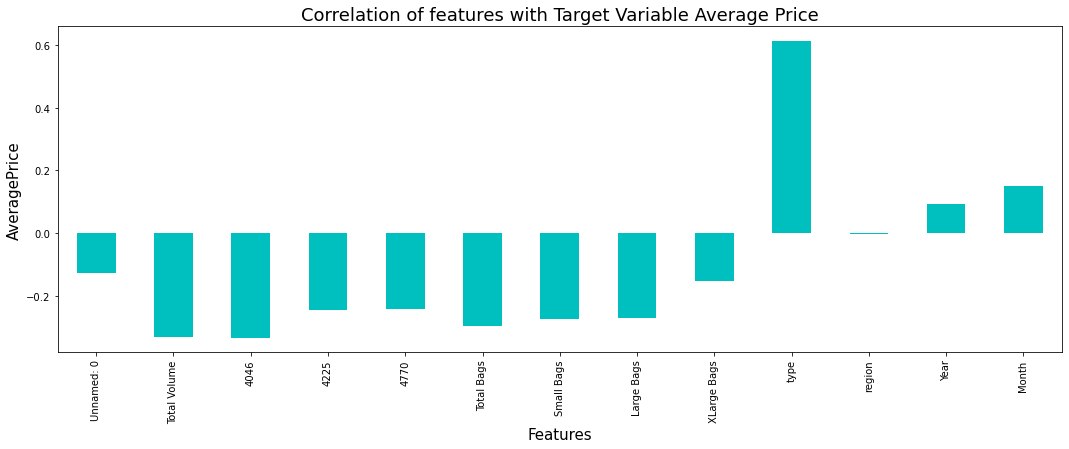

In [65]:
plt.figure(figsize = (18,6))
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [66]:
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


In [67]:
df3.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif['Features']= df3.columns
vif

,VIF,Features
0,8.915814,Unnamed: 0
1,24.373378,AveragePrice
2,7.822771,Total Volume
3,7.761301,Small Bags
4,1.977068,Large Bags
5,1.693554,XLarge Bags
6,3.643827,type
7,42.665915,Year
8,10.536329,Month


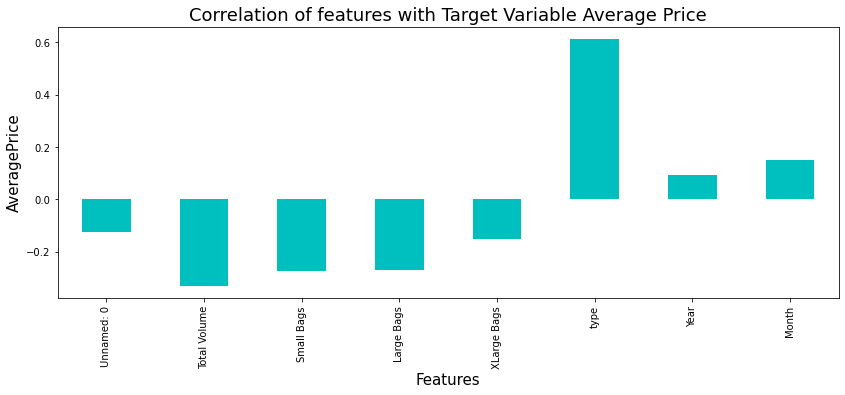

In [69]:
plt.figure(figsize = (14,5))
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [70]:
#Skewness
df3.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Year            0.229976
Month           0.107408
dtype: float64

In [71]:
for col in df3.columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col])

In [72]:
#Standard scalling
X = df3.drop('AveragePrice', axis=1)
Y = df3['AveragePrice']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

**Machine Learning Model Building**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 8)
Training target vector size: (11826,)
Test feature matrix size: (5825, 8)
Test target vector size: (5825,)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4973048553017628 on Random_state 557


In [77]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.14481256 1.12847325 1.65677417 ... 1.67347124 1.54837733 1.53710373]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.21922126225761515
Mean squared error : 0.07665827764722107
Root Mean Squared Error: 0.2768723128939061


 R2 Score :
0.49730485530176277


In [79]:
#Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.13238711115320964


In [80]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.12536230916310045
Mean squared error : 0.03078353772920107
Root Mean Squared Error: 0.17545238023236126


 R2 Score :
0.7981335424164027


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.21922125829719166
Mean squared error : 0.0766582802718206
Root Mean Squared Error: 0.27687231763363523


 R2 Score :
0.49730483809066073


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.1650489270386266
Mean squared error : 0.06154353648068669
Root Mean Squared Error: 0.24807969784060663


 R2 Score :
0.5964214442858469


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.20913396692102054
Mean squared error : 0.07055416501199044
Root Mean Squared Error: 0.2656203399816935


 R2 Score :
0.5373332498678758


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.1591492623773047
Mean squared error : 0.05707037881991292
Root Mean Squared Error: 0.23

In [81]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : 0.021415217081455818


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.1323870820271482


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.5181177672184475


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.039313627420778485


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.4447028491792688


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [83]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [84]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [ ]:
GCV.fit(X_train,Y_train)

## Final Model


In [87]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.13290743524805645
Mean squared error : 0.03328267336281177
Root Mean Squared Error: 0.1824353950383855


 R2 Score of Final Model :
0.7817451837483419




 True Values Vs Predicted Value plot :


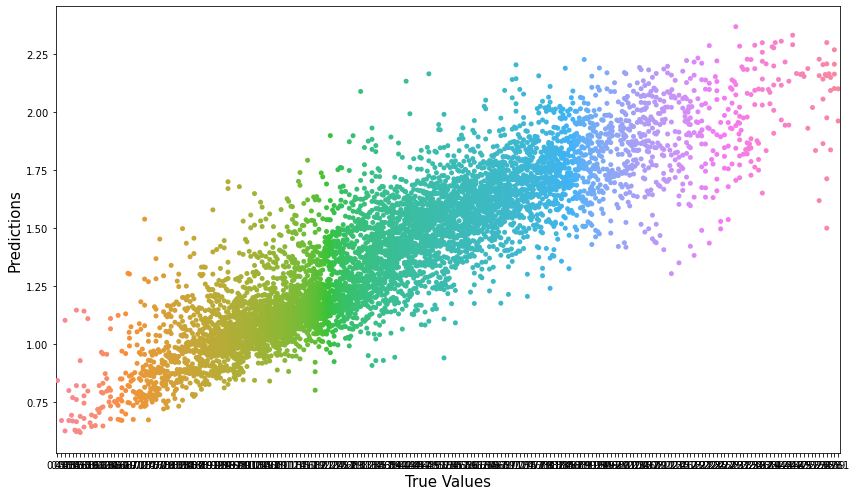

In [89]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()